In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [4]:
# loading the reuters dataset
#There are 46 different topics; some topics are more represented than others, but each topic
# has at least 10 examples in the trainingset.

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 3s 1us/step


In [5]:
len(train_data)


8982

In [6]:
len(test_data)

2246

In [7]:
train_data[0] # each example is list of integers.

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [8]:
# Preparing the data


In [9]:
# encoding the data

# first vectorizing the data.

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [11]:
# if using one hot encoding then

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)



In [12]:
# building network

# here using same 3 layers like before but now instead of 16 hidden units( 16 axes) now using 64 units.

# example :
# model.add(layers.Dense(64,activation = '' , input_shape=()))

# also additional feature is in last layer 

# model.add(layers.Dense(46,activation = '')) 
# here for each input , output will have 46 d vector,and with softmax activation it means it will produce a probabity score that will sum upto 1 using 46 output classes.


from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
# compiling the model 

# as optimizer use : rmsprop 
# loss function : categorical_crossentropy 
# because it measures distance between 2 probability distributions
# i.e between output by network and output by labelled data

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# now separating data for validation

# setting aside 1000 samples.

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
# training the model

# 20 epochs

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 531us/step - loss: 2.5803 - accuracy: 0.5390 - val_loss: 1.7046 - val_accuracy: 0.6520
Epoch 2/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.4078 - accuracy: 0.7107 - val_loss: 1.3120 - val_accuracy: 0.7250
Epoch 3/20
7982/7982 [==============================] - 1s 146us/step - loss: 1.0548 - accuracy: 0.7800 - val_loss: 1.1658 - val_accuracy: 0.7370
Epoch 4/20
7982/7982 [==============================] - 1s 149us/step - loss: 0.8405 - accuracy: 0.8216 - val_loss: 1.0462 - val_accuracy: 0.7690
Epoch 5/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.6699 - accuracy: 0.8559 - val_loss: 0.9740 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 148us/step - loss: 0.5388 - accuracy: 0.8865 - val_loss: 0.9337 - val_accuracy: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 146us/step - loss

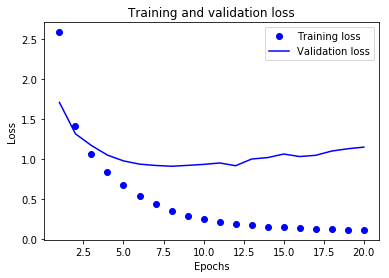

In [18]:
# now displaying it 

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

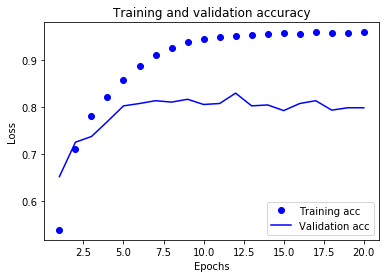

In [20]:
# now displaying training and validation accuracy 
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [21]:
# in our case the overfitting begins at around 12-13 epochs

# so re training it for 12 epochs

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=12,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/12
7982/7982 [==============================] - 1s 159us/step - loss: 2.7214 - accuracy: 0.4688 - val_loss: 1.8170 - val_accuracy: 0.6340
Epoch 2/12
7982/7982 [==============================] - 1s 144us/step - loss: 1.4757 - accuracy: 0.7058 - val_loss: 1.3202 - val_accuracy: 0.7160
Epoch 3/12
7982/7982 [==============================] - 1s 144us/step - loss: 1.0717 - accuracy: 0.7783 - val_loss: 1.1350 - val_accuracy: 0.7600
Epoch 4/12
7982/7982 [==============================] - 1s 148us/step - loss: 0.8466 - accuracy: 0.8201 - val_loss: 1.0449 - val_accuracy: 0.7770
Epoch 5/12
7982/7982 [==============================] - 1s 146us/step - loss: 0.6837 - accuracy: 0.8553 - val_loss: 0.9964 - val_accuracy: 0.7900
Epoch 6/12
7982/7982 [==============================] - 1s 146us/step - loss: 0.5559 - accuracy: 0.8850 - val_loss: 0.9421 - val_accuracy: 0.8140
Epoch 7/12
7982/7982 [==============================] - 1s 148us/step - loss

In [22]:
results

[1.1089019242504932, 0.7662510871887207]

In [23]:
# retarining again

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=11,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/11
7982/7982 [==============================] - 1s 154us/step - loss: 2.7194 - accuracy: 0.5148 - val_loss: 1.8035 - val_accuracy: 0.6630
Epoch 2/11
7982/7982 [==============================] - 1s 142us/step - loss: 1.4753 - accuracy: 0.7055 - val_loss: 1.3348 - val_accuracy: 0.6980
Epoch 3/11
7982/7982 [==============================] - 1s 142us/step - loss: 1.0788 - accuracy: 0.7711 - val_loss: 1.1297 - val_accuracy: 0.7470
Epoch 4/11
7982/7982 [==============================] - 1s 144us/step - loss: 0.8434 - accuracy: 0.8158 - val_loss: 1.0302 - val_accuracy: 0.7770
Epoch 5/11
7982/7982 [==============================] - 1s 147us/step - loss: 0.6669 - accuracy: 0.8568 - val_loss: 0.9559 - val_accuracy: 0.8020
Epoch 6/11
7982/7982 [==============================] - 1s 154us/step - loss: 0.5358 - accuracy: 0.8866 - val_loss: 0.9133 - val_accuracy: 0.8190
Epoch 7/11
7982/7982 [==============================] - 1s 144us/step - loss

In [24]:
results

# slight better

[1.0202282774374087, 0.784060537815094]

In [25]:
# retarining again 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=14,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/14
7982/7982 [==============================] - 1s 155us/step - loss: 2.5720 - accuracy: 0.5180 - val_loss: 1.7317 - val_accuracy: 0.6270
Epoch 2/14
7982/7982 [==============================] - 1s 146us/step - loss: 1.4167 - accuracy: 0.6942 - val_loss: 1.3006 - val_accuracy: 0.7130
Epoch 3/14
7982/7982 [==============================] - 1s 144us/step - loss: 1.0417 - accuracy: 0.7725 - val_loss: 1.1213 - val_accuracy: 0.7510
Epoch 4/14
7982/7982 [==============================] - 1s 144us/step - loss: 0.8175 - accuracy: 0.8235 - val_loss: 1.0287 - val_accuracy: 0.7770
Epoch 5/14
7982/7982 [==============================] - 1s 155us/step - loss: 0.6532 - accuracy: 0.8582 - val_loss: 0.9764 - val_accuracy: 0.7870
Epoch 6/14
7982/7982 [==============================] - 1s 144us/step - loss: 0.5189 - accuracy: 0.8913 - val_loss: 0.9237 - val_accuracy: 0.8140
Epoch 7/14
7982/7982 [==============================] - 1s 144us/step - loss

In [26]:
results

[1.091252844140451, 0.7871772050857544]

In [27]:
# increasing as epochs increasing

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=16,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/16
7982/7982 [==============================] - 1s 153us/step - loss: 2.6367 - accuracy: 0.4752 - val_loss: 1.7538 - val_accuracy: 0.6300
Epoch 2/16
7982/7982 [==============================] - 1s 144us/step - loss: 1.4492 - accuracy: 0.6880 - val_loss: 1.3227 - val_accuracy: 0.7140
Epoch 3/16
7982/7982 [==============================] - 1s 144us/step - loss: 1.0667 - accuracy: 0.7771 - val_loss: 1.1308 - val_accuracy: 0.7670
Epoch 4/16
7982/7982 [==============================] - 1s 149us/step - loss: 0.8380 - accuracy: 0.8224 - val_loss: 1.0587 - val_accuracy: 0.7650
Epoch 5/16
7982/7982 [==============================] - 1s 146us/step - loss: 0.6581 - accuracy: 0.8637 - val_loss: 0.9872 - val_accuracy: 0.7880
Epoch 6/16
7982/7982 [==============================] - 1s 147us/step - loss: 0.5274 - accuracy: 0.8921 - val_loss: 0.9047 - val_accuracy: 0.8110
Epoch 7/16
7982/7982 [==============================] - 1s 148us/step - loss

In [28]:
results

# so trade off is between 11 < epochs < 16

[1.121366068389091, 0.7849510312080383]

In [29]:

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1834372217275156

In [30]:
# Predicting for the test data // testing our model.

predictions = model.predict(x_test)

In [31]:
predictions[0].shape

(46,)

In [32]:
# now max value should be 1
np.sum(predictions[0]) # this is sum of all 46 output classes

1.0

In [33]:
np.argmax(predictions[0]) # class with highest probability

3

In [34]:
# now lets play with it 

# what if number of hidden units is increased or decreased ?

# case 1 : increase the number of hidden units and measure accuracy


model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 239us/step - loss: 1.7278 - accuracy: 0.6346 - val_loss: 1.1954 - val_accuracy: 0.7290
Epoch 2/20
7982/7982 [==============================] - 2s 220us/step - loss: 0.9287 - accuracy: 0.7939 - val_loss: 1.0038 - val_accuracy: 0.7840
Epoch 3/20
7982/7982 [==============================] - 2s 222us/step - loss: 0.6033 - accuracy: 0.8663 - val_loss: 0.8859 - val_accuracy: 0.8270
Epoch 4/20
7982/7982 [==============================] - 2s 223us/step - loss: 0.4017 - accuracy: 0.9142 - val_loss: 0.8666 - val_accuracy: 0.8160
Epoch 5/20
7982/7982 [==============================] - 2s 224us/step - loss: 0.2879 - accuracy: 0.9366 - val_loss: 0.9186 - val_accuracy: 0.8090
Epoch 6/20
7982/7982 [==============================] - 2s 226us/step - loss: 0.2195 - accuracy: 0.9456 - val_loss: 0.9829 - val_accuracy: 0.8040
Epoch 7/20
7982/7982 [==============================] - 2s 226us/step - loss

In [35]:
results

# so accuracy is at 79.30

[1.121366068389091, 0.7849510312080383]

In [36]:
# case 2 : reduce the number of hidden units 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 233us/step - loss: 3.0517 - accuracy: 0.1535 - val_loss: 2.3686 - val_accuracy: 0.4110
Epoch 2/20
7982/7982 [==============================] - 2s 217us/step - loss: 1.9547 - accuracy: 0.5124 - val_loss: 1.6957 - val_accuracy: 0.6130
Epoch 3/20
7982/7982 [==============================] - 2s 220us/step - loss: 1.4804 - accuracy: 0.6477 - val_loss: 1.4878 - val_accuracy: 0.6480
Epoch 4/20
7982/7982 [==============================] - 2s 227us/step - loss: 1.3177 - accuracy: 0.6726 - val_loss: 1.4304 - val_accuracy: 0.6510
Epoch 5/20
7982/7982 [==============================] - 2s 223us/step - loss: 1.2242 - accuracy: 0.6802 - val_loss: 1.4155 - val_accuracy: 0.6490
Epoch 6/20
7982/7982 [==============================] - 2s 226us/step - loss: 1.1516 - accuracy: 0.6803 - val_loss: 1.4295 - val_accuracy: 0.6460
Epoch 7/20
7982/7982 [==============================] - 2s 223us/step - loss

In [38]:
#  val_accuracy: 0.6680 :: so accuracy has reduced to 66 % from 79 % when
# number of hidden units are decreased